In [253]:
import numpy as np
from numpy.polynomial import polynomial
from scipy.interpolate import lagrange
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(555)


In [254]:
def draw_path(path, ax, c='black'):
    for i in range(1, path.size):
        ax.plot(path[i-1:i+1, 0], path[i-1:i+1, 1], '.-', color=c)


# Generating Population


<Axes: xlabel='x', ylabel='y'>

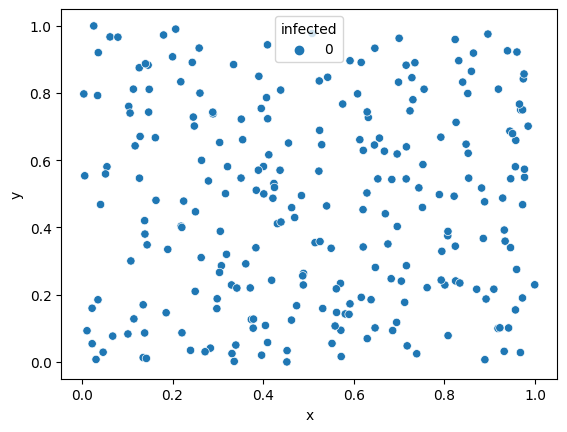

In [255]:
def generate_population(n=250):
    locations = [{"x": np.random.random(), "y": np.random.random(), "infected": 0}
                 for _ in range(n)]
    return pd.DataFrame(locations)


pop = generate_population()
sns.scatterplot(pop, x="x", y="y", hue="infected")


# Generating Path


5.069478359213119


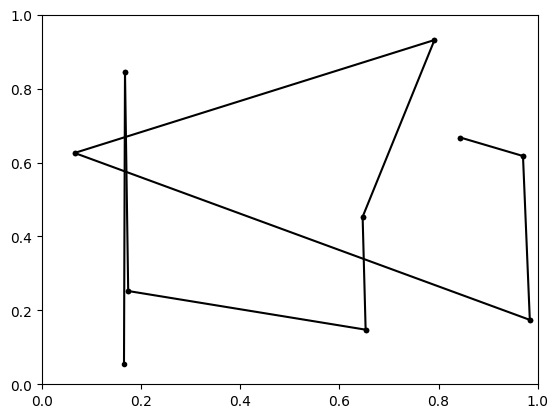

In [256]:
def generate_path(points=10):
    directions = np.random.random(size=(points, 2))
    return directions


def all_distances(path):
    distances = [np.linalg.norm(path[i - 1] - path[i])
                 for i in range(1, path.shape[0])]
    return distances


def total_distance(path):
    return np.sum(all_distances(path))


path = generate_path()
print(total_distance(path))

fig, ax = plt.subplots(1)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
draw_path(path, ax)


## Parametrizing the path


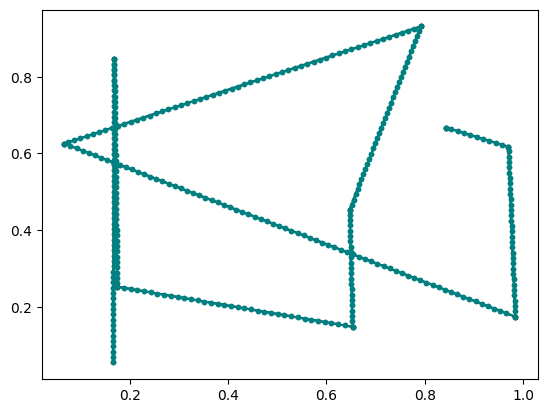

In [257]:
def normalize_vec(v):
    norm = np.linalg.norm(v)
    return v / norm


def parametrize_to_arr(path, ret_size=364):
    tot_dist = total_distance(path)
    all_dist = all_distances(path)
    step_size = tot_dist / ret_size

    def parametrize_line(p1, p2, ret_size):
        if ret_size == 0:
            return []

        direction = normalize_vec(p2 - p1)
        step = direction * step_size

        return [p1 + i * step for i in range(ret_size)]

    parametrized_arr = []
    for i, dist in enumerate(all_dist):
        n_points = round(dist / step_size)
        parametrized_arr += parametrize_line(path[i], path[i+1], n_points)

    return np.array(parametrized_arr + [path[-1]])


parametrized_path = parametrize_to_arr(path)
fig, ax = plt.subplots(1)
draw_path(path, ax)
draw_path(parametrized_path, ax, 'teal')
